## IBM Data Science Certificate Data Visualization Practice Project (Part 1)
### Title: Visualizaions using Matplotlib, Seaborn, and Folium

In [174]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')
data.sample(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
85,2/28/2002,2002,Feb,1,95.26,0.75,18761.084,1938,7,56.180,0.523015,3.1,688.2,Supperminicar,New York
511,8/31/2022,2022,Aug,0,97.00,0.25,24748.809,3681,7,13.076,-2.595748,3.0,1739.6,Sports,Illinois
520,5/31/2023,2023,May,0,97.63,1.50,16652.974,1692,6,69.109,0.381629,1.5,4090.0,Sports,New York
369,6/30/2010,2010,Jun,0,107.52,0.75,22993.898,3490,5,32.732,0.501130,1.6,2182.4,Mediumfamilycar,Illinois
158,11/30/1986,1986,Nov,0,106.67,0.25,32389.470,3449,4,36.799,0.469578,1.2,2365.7,Executivecar,New York


**TASK 1.1**. Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year.

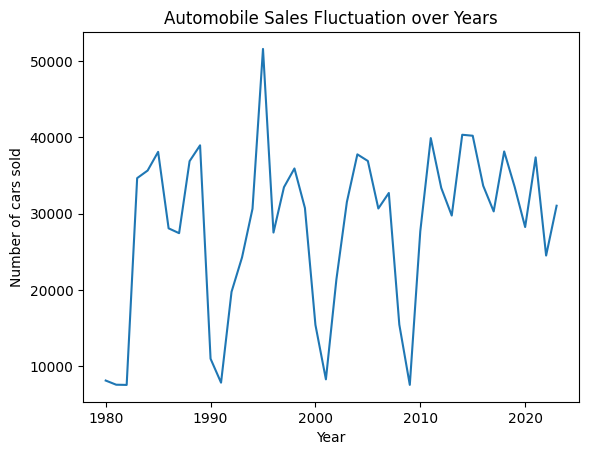

In [3]:
data.groupby('Year')['Automobile_Sales'].sum().plot(kind='line')
plt.ylabel('Number of cars sold')
plt.title('Automobile Sales Fluctuation over Years')
plt.show()

**Task 1.2**. Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?"

In [4]:
years = data['Year'].unique()
data_by_types = data.groupby(['Vehicle_Type', 'Year'])['Automobile_Sales'].sum().reset_index()
types = data_by_types['Vehicle_Type'].unique()
data_by_types

df = pd.DataFrame(index=types)
df[years] = np.nan

for t in types:
    for y in years:
        df1 = data_by_types[data_by_types['Vehicle_Type'] == t]
        df2 = df1[df1['Year'] == y]
        list = df2['Automobile_Sales'].values
        if len(list) > 0:
            df.loc[t,y] = list[0]
df # Recreated the data frame to for visualization
df = df.transpose()

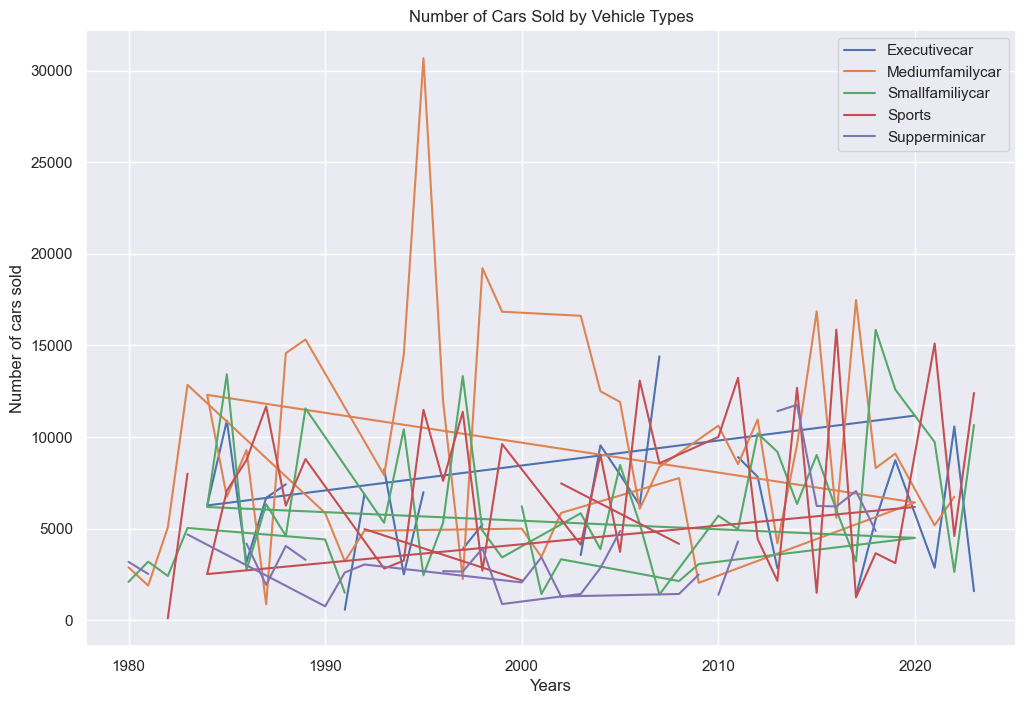

In [102]:
df.plot(figsize=(12,8))
plt.xlabel("Years")
plt.ylabel("Number of cars sold")
plt.title("Number of Cars Sold by Vehicle Types")
plt.show()

# For some reason, this approach does not seem to work as intended. (See the below line graphs.) 
# Instead, we use plotly.express (px) after this.

In [6]:
df # Perhaps the issues are caused by NaN values? (We also see below that plotly.express does not have these issues.)

,Executivecar,Mediumfamilycar,Smallfamiliycar,Sports,Supperminicar
1980,NaN,2882.50,2085.7,NaN,3179.2
1981,NaN,1885.20,3192.1,NaN,2523.6
1982,NaN,5062.90,2408.9,102.0,NaN
1983,4120.2,12845.60,5030.6,7998.7,4677.1
1990,NaN,5847.70,4404.8,NaN,754.8
1991,564.0,3210.70,1495.8,NaN,2600.2
1992,6887.8,4877.10,NaN,4970.4,3037.1
2000,NaN,4995.30,6219.3,2168.0,2058.9
2001,NaN,3448.50,1426.9,NaN,3430.2
2002,3461.9,5854.70,3322.3,7467.2,1292.5


In [110]:
grouped_data = data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

recession_data = data[data['Recession']==1]
recession_grouped = rececssion_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

figure = px.line(
                grouped_data,
                x = 'Year',
                y = 'Automobile_Sales',
                color = 'Vehicle_Type',
                labels = {'Vehicle_Type': 'Vehicle Type',
                          'Automobile_Sales': 'Automobile Sales'},
                title = 'Trend of Automobile Sales by Different Vehicle Types'
            )

figure.add_trace(go.Scatter(x=recession_grouped['Year'], y= recession_grouped['Automobile_Sales'],
                    mode='markers', marker_color='black', name='Sales in Recession Periods'))
figure.show()

**Task 1.3**. Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [111]:
non_recession_data = data[data['Recession']==0]
non_recession_grouped = non_rececssion_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
non_recession_grouped['Year'] = non_recession_grouped['Year'].astype('int64')

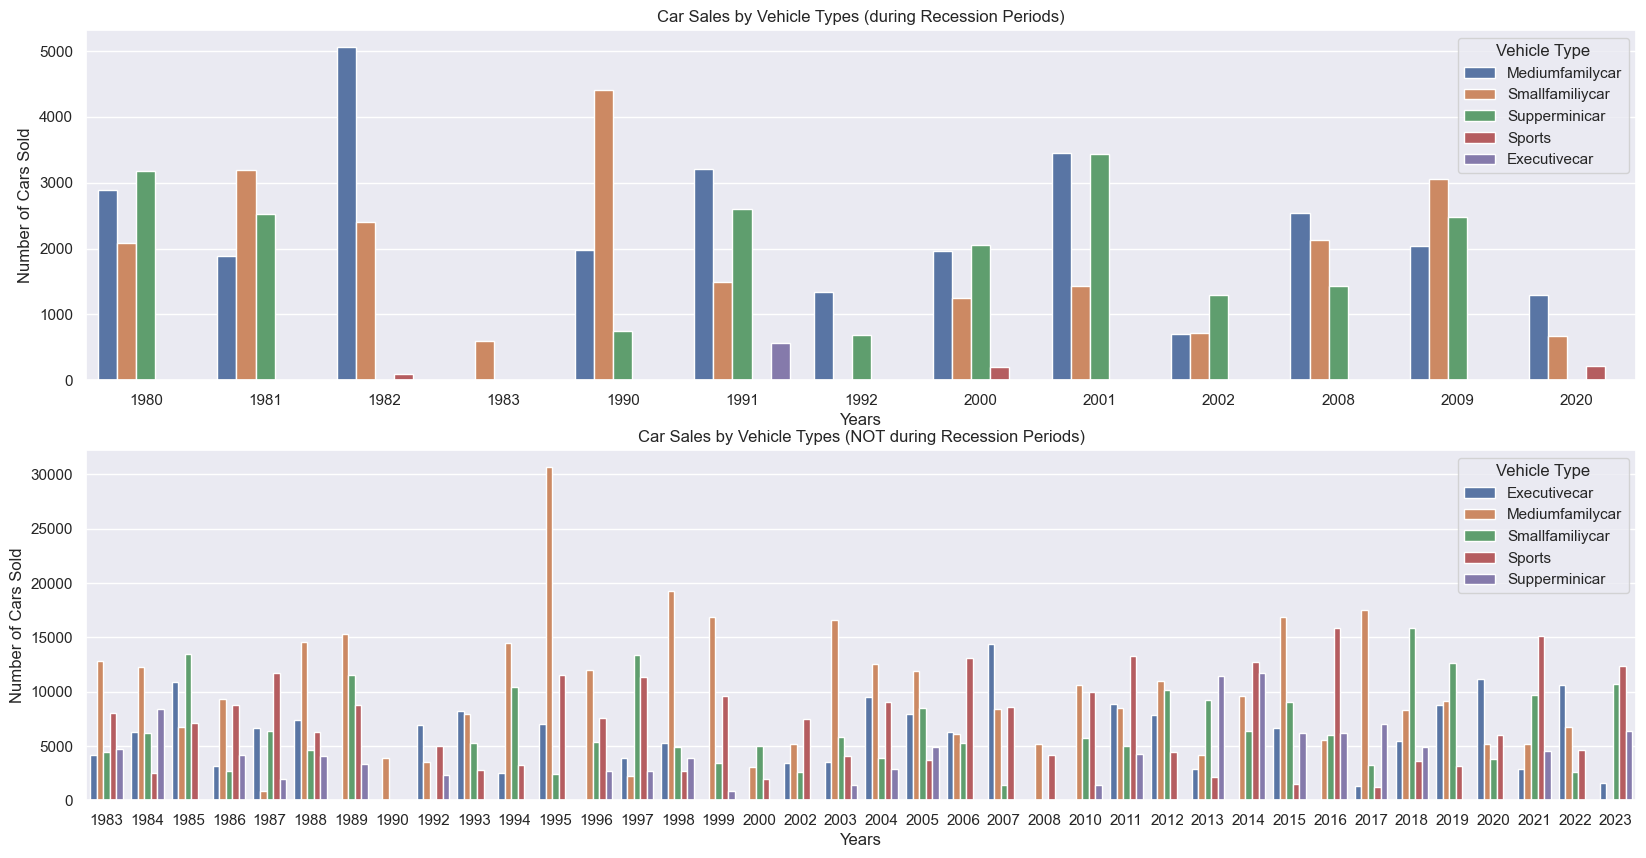

In [112]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

sns.barplot(recession_grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', ax=axes[0])

sns.barplot(non_recession_grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', ax=axes[1])

axes[0].set(xlabel='Years', ylabel='Number of Cars Sold')
axes[0].set_title('Car Sales by Vehicle Types (during Recession Periods)')
axes[0].legend(title='Vehicle Type', loc='upper right')

axes[1].set(xlabel='Years', ylabel='Number of Cars Sold')
axes[1].set_title('Car Sales by Vehicle Types (NOT during Recession Periods)')
axes[1].legend(title='Vehicle Type', loc='upper right')

# fig.tight_layout()
plt.show()

**Task 1.4**. Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

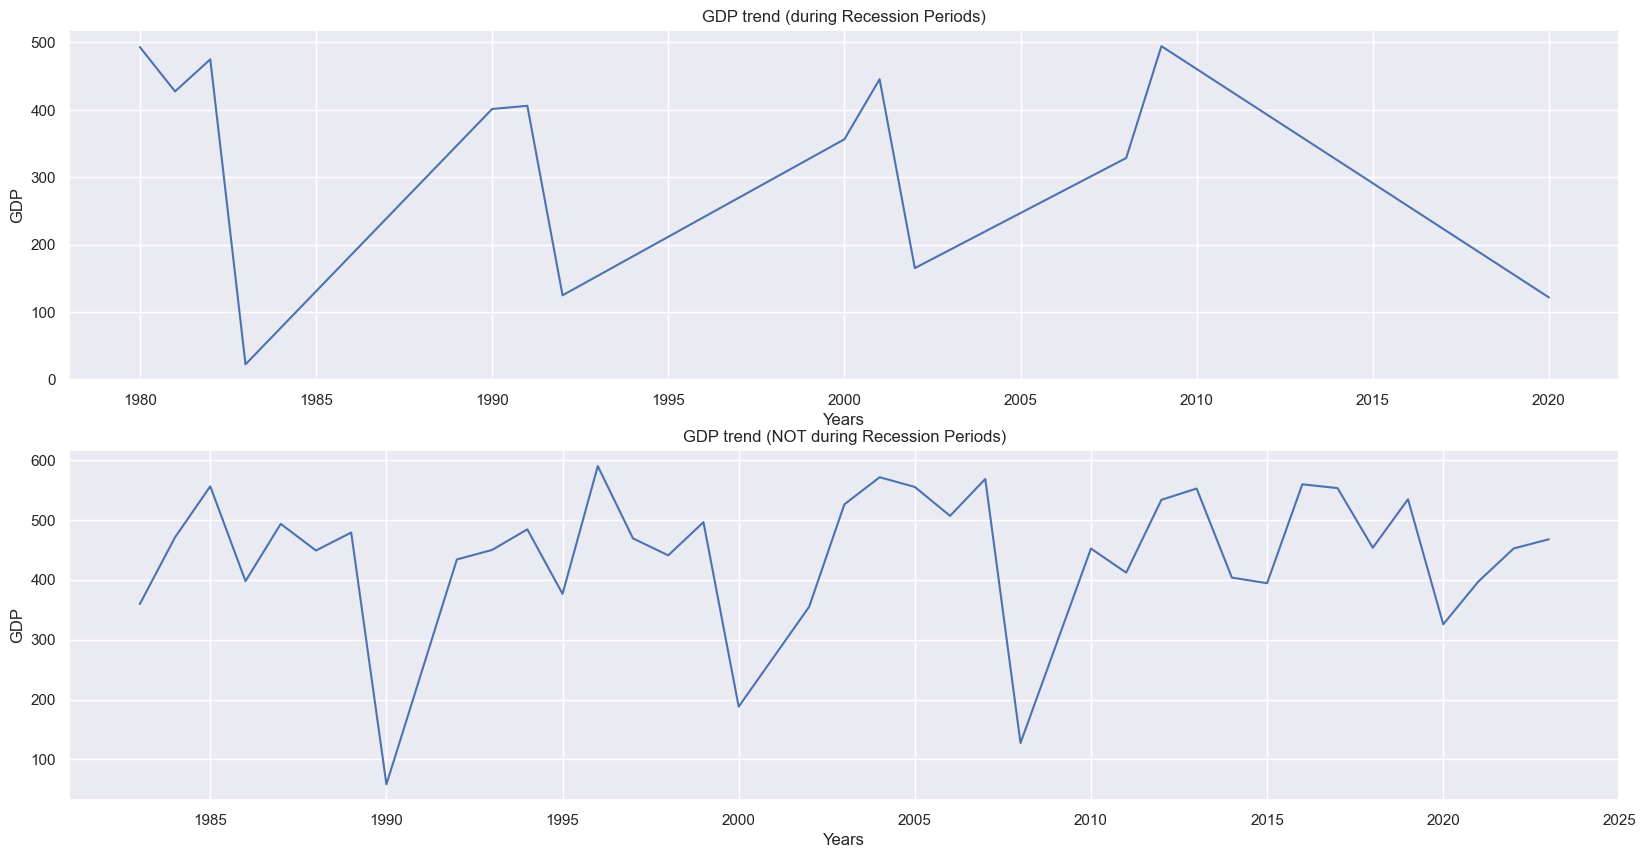

In [113]:
non_recession_gdp = non_recession_data.groupby('Year')['GDP'].sum().reset_index()
recession_gdp = recession_data.groupby('Year')['GDP'].sum().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(recession_gdp, x='Year', y='GDP', ax=axes[0])
sns.lineplot(non_recession_gdp, x='Year', y='GDP', ax=axes[1])

axes[0].set(xlabel='Years', ylabel='GDP')
axes[0].set_title('GDP trend (during Recession Periods)')

axes[1].set(xlabel='Years', ylabel='GDP')
axes[1].set_title('GDP trend (NOT during Recession Periods)')

plt.show()


**Task 1.5**. Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

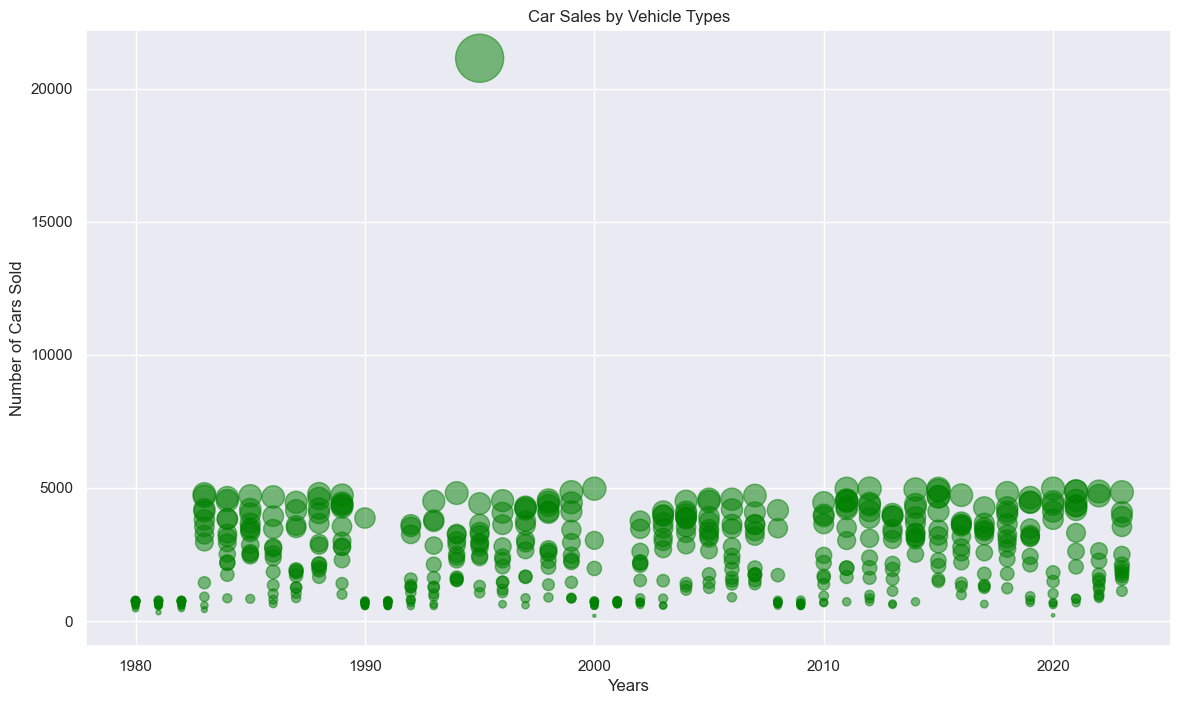

In [114]:
# normalize data
norm_sales = (data['Automobile_Sales'] - data['Automobile_Sales'].min()) / (data['Automobile_Sales'].max() - data['Automobile_Sales'].min())

# bubble plot
ax = data.plot(kind='scatter',
                    x='Year',
                    y='Automobile_Sales',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_sales * 1200,  # pass in weights 
                )

ax.set_xlabel('Years')
ax.set_ylabel('Number of Cars Sold')
ax.set_title('Car Sales by Vehicle Types')
plt.show()

**Task 1.6**. Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

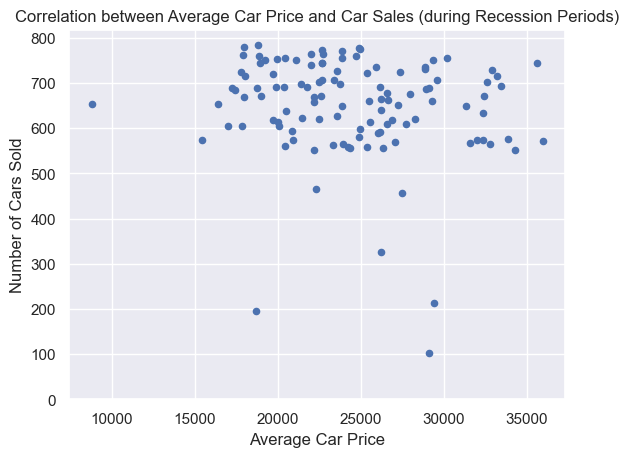

In [122]:
recession_data.plot(kind='scatter', x='Price', y='Automobile_Sales')
# 'Price' is supposed to be average price according to the given guideline
plt.xlabel('Average Car Price')
plt.ylabel('Number of Cars Sold')
plt.title('Correlation between Average Car Price and Car Sales (during Recession Periods)')
plt.ylim(0,)
plt.show()

**Task 1.7**. Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

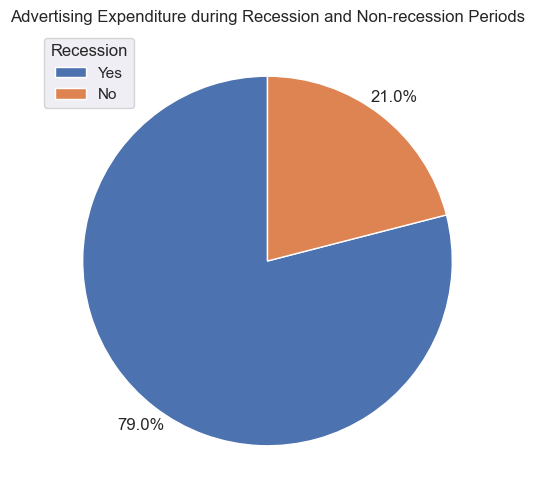

In [164]:
data_ad_by_rec = data.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

ax = data_ad_by_rec['Advertising_Expenditure'].plot(
    kind='pie',
    figsize=(6, 6),
    autopct='%1.1f%%', # percentage labels
    startangle=90,    
    shadow=False,
    legend = 'Recession',       
    labels=None,         # turn off labels on pie chart
    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    #colors=colors_list,  # add custom colors
    )

plt.legend(['Yes', 'No'], title='Recession', loc='upper left')
plt.title('Advertising Expenditure during Recession and Non-recession Periods')
ax.yaxis.set_visible(False) # This removes the column name on the left
plt.show()

**Task 1.8**. Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

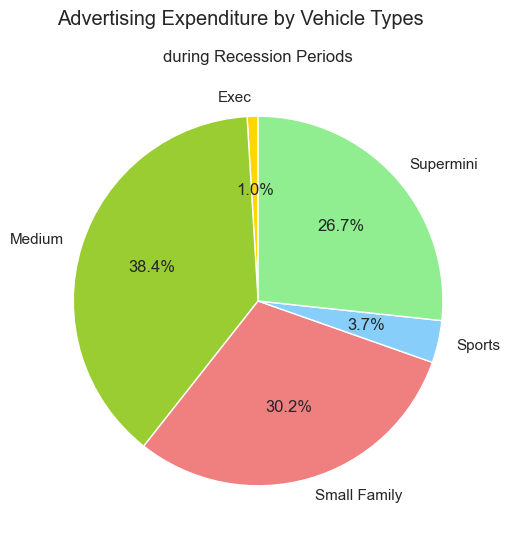

In [206]:
ad_rec_by_type = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
ad_non_rec_by_type = non_recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

fig = plt.figure(figsize=(36, 12)) # create figure
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

fig.suptitle('Advertising Expenditure by Vehicle Types ')

ax = ad_rec_by_type['Advertising_Expenditure'].plot(
    kind='pie',
    figsize=(12, 6),
    autopct='%1.1f%%', # percentage labels
    startangle=90,    
    shadow=False,    
    labels=['Exec', 'Medium', 'Small Family', 'Sports', 'Supermini'],
    #pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    colors=colors_list,  # add custom colors
    )

plt.title('during Recession Periods')
ax.yaxis.set_visible(False) # This removes the column name on the left

plt.show()

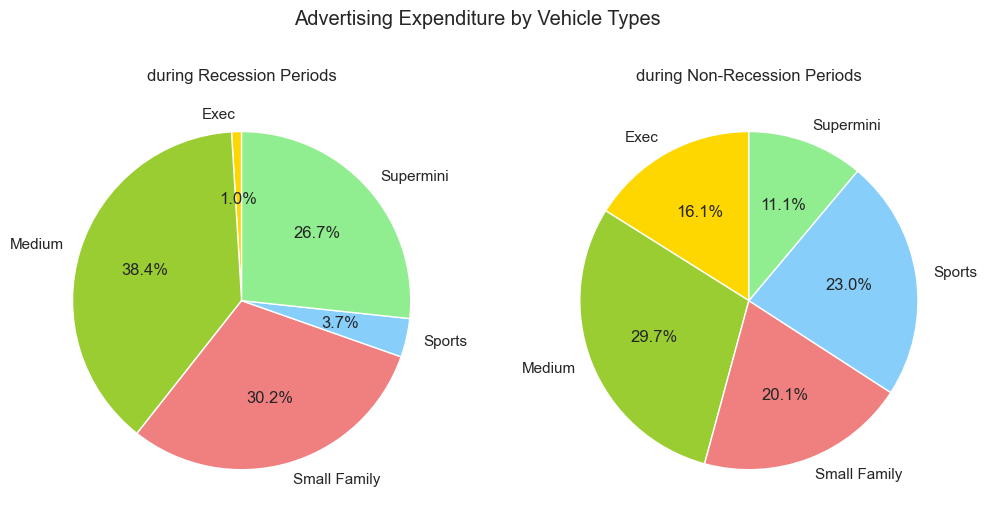

In [202]:
# If we want to compare recession periods and non-recession periods, we can use subplotting as follows:

ad_rec_by_type = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
ad_non_rec_by_type = non_recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

fig = plt.figure(figsize=(36, 12)) # create figure
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
fig.suptitle('Advertising Expenditure by Vehicle Types ')

# Subplot 1
ad_rec_by_type['Advertising_Expenditure'].plot(
    kind='pie',
    figsize=(12, 6),
    autopct='%1.1f%%', # percentage labels
    startangle=90,    
    shadow=False,    
    labels=['Exec', 'Medium', 'Small Family', 'Sports', 'Supermini'],
    #pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    colors=colors_list,  # add custom colors
    ax=ax0) # add to subplot 1

ax0.set_title('during Recession Periods')
ax0.yaxis.set_visible(False) # This removes the column name on the left

# Subplot 2
ad_non_rec_by_type['Advertising_Expenditure'].plot(
    kind='pie',
    figsize=(12, 6),
    autopct='%1.1f%%', # percentage labels
    startangle=90,    
    shadow=False,    
    labels=['Exec', 'Medium', 'Small Family', 'Sports', 'Supermini'],
    #pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    colors=colors_list,  # add custom colors
    ax=ax1
    ) # add to subplot 2

ax1.set_title('during Non-Recession Periods')
ax1.yaxis.set_visible(False) # This removes the column name on the left
plt.show()

**Task 1.9**. Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period. 

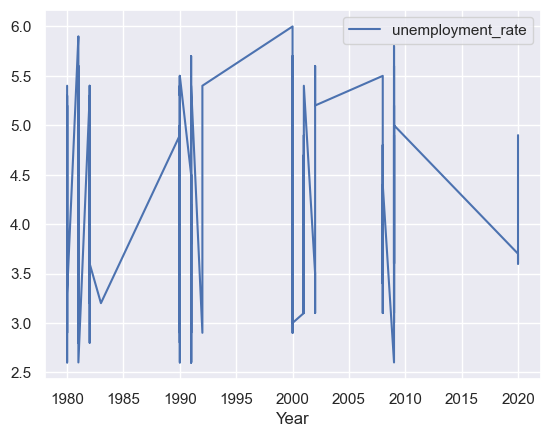

In [213]:
fig = plt.figure()
ax1 = fig.add

recession_data.plot(kind='line', x='Year', y='unemployment_rate')

y='Automobile_Sales'